In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np

plt.rcParams['figure.figsize'] = [12, 6]

%matplotlib inline

In [2]:
PROJECT_PATH = Path(os.path.dirname(os.path.dirname(os.path.abspath('movie-dataset (Gráficos)'))))
DADOS_PATH = PROJECT_PATH / 'dados' / 'saida' / 'movies.csv'

In [3]:
df = pd.read_csv(DADOS_PATH, parse_dates=['date'])
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date,liquid
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146,1980-06-13,27998772.0
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104,1980-07-02,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124,1980-06-20,520375067.0
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88,1980-07-02,79953539.0
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98,1980-07-25,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,O,R,Drama,6.1,19000.0,Tim Blake Nelson,William Shakespeare,Mekhi Phifer,United States,5000000.0,19260537.0,Chickie the Cop,95,2001-08-31,14260537.0
2541,Birthday Girl,R,Comedy,6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United States,13000000.0,16171098.0,FilmFour,93,2001-02-01,3171098.0
2542,Made,R,Comedy,6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95,2001-08-31,480653.0
2543,One Night at McCool's,R,Comedy,6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93,2001-04-27,-4421814.0


In [4]:
base = df.copy()

# Date (Data)

In [5]:
sns.set_theme()

---

## Em qual período, anual e mensal, que houveram mais filmes?

In [6]:
qtd_filmes_ao_ano = base.groupby(base.date.dt.year)['name'].count().reset_index()
qtd_filmes_ao_ano

,date,name
0,1980,40
1,1981,63
2,1982,70
3,1983,81
4,1984,89
5,1985,94
6,1986,99
7,1987,102
8,1988,129
9,1989,115


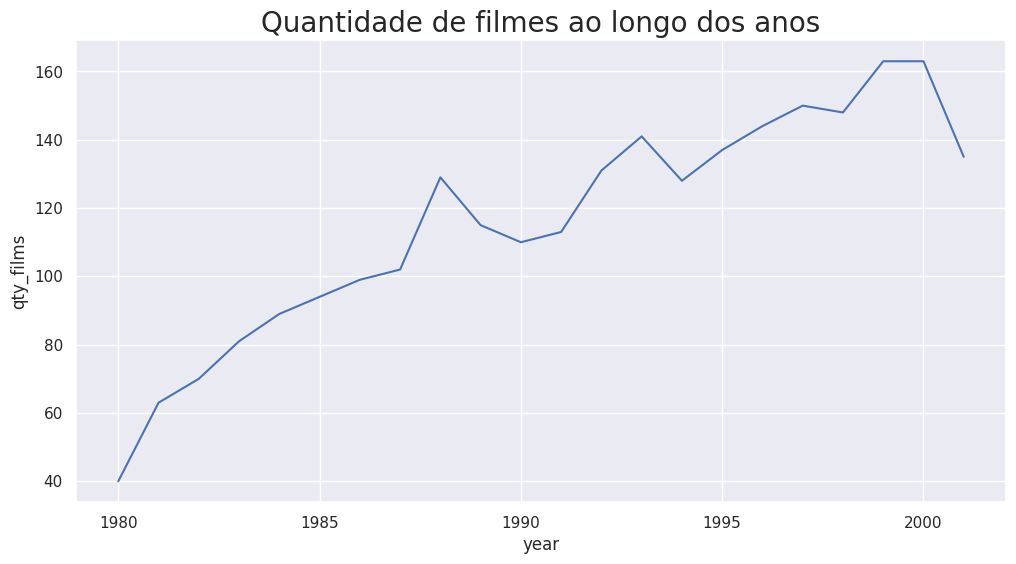

In [7]:
fig = sns.lineplot(
    data=qtd_filmes_ao_ano,
    x='date',
    y='name'
)
fig.set(ylabel='qty_films', xlabel='year');
fig.set_title('Quantidade de filmes ao longo dos anos', fontdict={'fontsize': 20});

In [8]:
qtd_filmes_mes = base.groupby(base.date.dt.month_name().str.slice(stop=3))['name'].count().reset_index().sort_values(by='date')
qtd_filmes_mes

,date,name
0,Apr,193
1,Aug,245
2,Dec,221
3,Feb,197
4,Jan,178
5,Jul,219
6,Jun,206
7,Mar,220
8,May,191
9,Nov,239


In [9]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

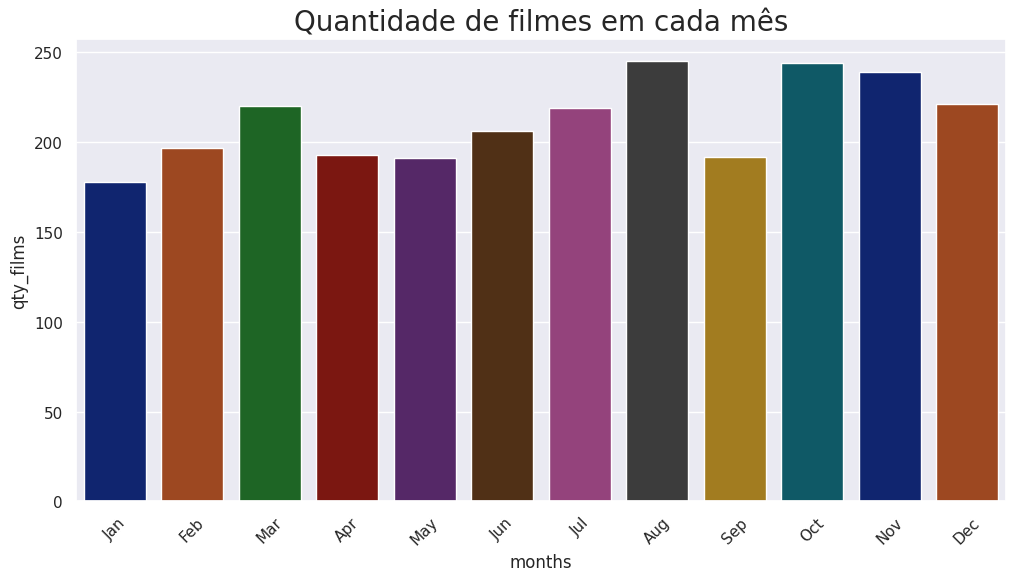

In [10]:
fig = sns.barplot(
    data=qtd_filmes_mes,
    x='date',
    y='name',
    order=months,
    palette='dark'
)
fig.set(ylabel='qty_films', xlabel='months')
fig.set_title('Quantidade de filmes em cada mês', fontdict={'fontsize': 20})
fig.tick_params(axis='x', rotation=45)

---

## Qual a tendência de gêneros de filmes ao longo de determinado período de tempo?

In [11]:
ex = base.groupby([base.date.dt.year, 'genre'])[['genre']].size().reset_index().rename(columns={0: 'count'})
ex.set_index('date', inplace=True)

/tmp/ipykernel_5794/3441032220.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


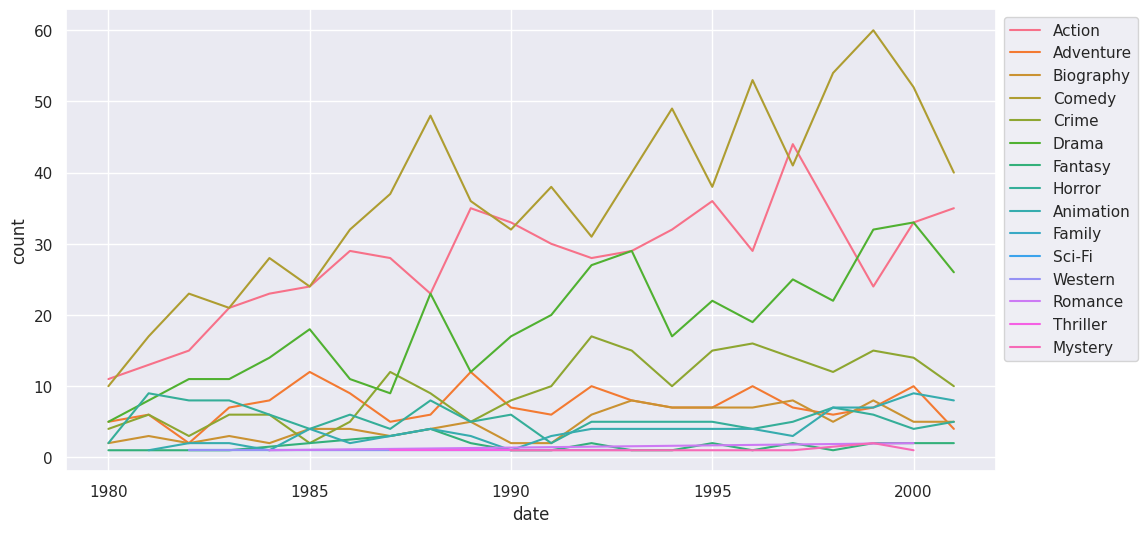

In [12]:
ex = ex.loc[lambda f: f.index.isin([int(x) for x in range(1979, 2002)])]
fig = sns.lineplot(data=ex, x=ex.index, y='count', hue='genre')
xlabels = ['{:.0f}'.format(x) for x in fig.get_xticks()]
fig.set_xticklabels(xlabels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

---

## Qual a projeção, em porcentagem do lucro de filmes ao longo do tempo? O lucro diminuiu ou aumentou, ao longo do tempo?

In [13]:
lucro = base.groupby(base.date.dt.year)[['liquid']].sum().reset_index()
lucro['rolling_avg'] = lucro['liquid'].rolling(7).mean()
lucro

,date,liquid,rolling_avg
0,1980,1.309029e+09,NaN
1,1981,1.145857e+09,NaN
2,1982,1.880445e+09,NaN
3,1983,1.433019e+09,NaN
4,1984,1.887451e+09,NaN
5,1985,2.032200e+09,NaN
6,1986,1.672593e+09,1.622942e+09
7,1987,2.009338e+09,1.722986e+09
8,1988,2.626698e+09,1.934535e+09
9,1989,3.804330e+09,2.209375e+09


/tmp/ipykernel_5794/1493418243.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure.set_yticklabels(yticks)


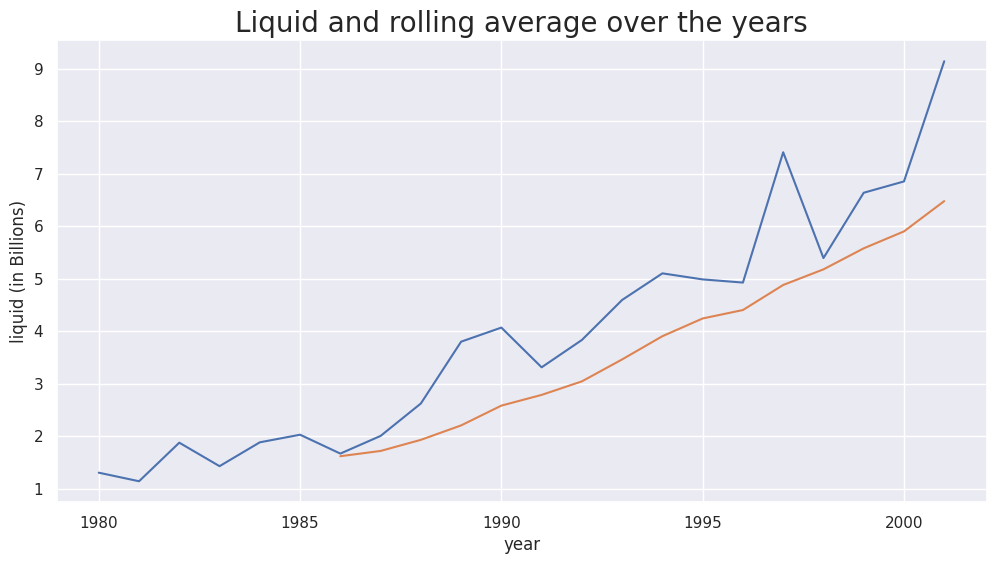

In [14]:
fig, axs = plt.subplots(ncols=1)
figure = sns.lineplot(data=lucro, x='date', y='liquid', ax=axs)
yticks = ['{:,.0f}'.format(x) for x in figure.get_yticks() // 1000000000]
figure.set(xlabel='year', ylabel='liquid (in Billions)')
figure.set_yticklabels(yticks)
figure.set_title('Liquid and rolling average over the years', fontdict={'fontsize': 20})
sns.lineplot(data=lucro, x='date', y='rolling_avg', ax=axs);

In [15]:
lucro_pct = base.groupby(base.date.dt.year)[['liquid']].sum().pct_change().reset_index().assign(liquid=lambda x: x['liquid'] * 100)
lucro_pct

,date,liquid
0,1980,NaN
1,1981,-12.465055
2,1982,64.108113
3,1983,-23.793648
4,1984,31.711546
5,1985,7.669021
6,1986,-17.695435
7,1987,20.133113
8,1988,30.724511
9,1989,44.833177


/tmp/ipykernel_5794/2000875177.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure.set_xticklabels(xlabels)


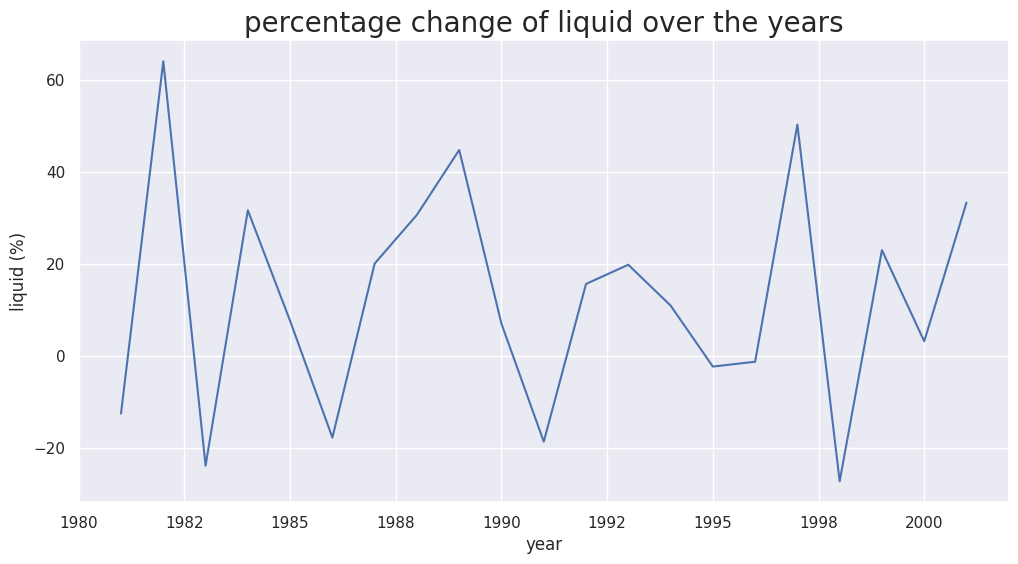

In [16]:
fig, axs = plt.subplots(ncols=1)
figure = sns.lineplot(data=lucro_pct, x='date', y='liquid', ax=axs)
figure.set(xlabel='year', ylabel='liquid (%)')
xlabels = ['{:.0f}'.format(x) for x in figure.get_xticks()]
figure.set_xticklabels(xlabels)
figure.set_title('percentage change of liquid over the years', fontdict={'fontsize': 20});


---

## Qual a projeção, ao longo do tempo, do custo dos filmes? Eles ficaram mais caros ou mais baratos?

In [35]:
custo = base.groupby(base.date.dt.year)[['budget']].sum().assign(
    bud_median = lambda f: f['budget'].rolling(5).mean(),
    bud_mean = lambda f: f['budget'].rolling(7).median()
)
custo

,budget,bud_median,bud_mean
date,,,
1980,4.626500e+08,NaN,NaN
1981,6.929000e+08,NaN,NaN
1982,8.204750e+08,NaN,NaN
1983,8.874290e+08,NaN,NaN
1984,1.110605e+09,7.948118e+08,NaN
1985,1.201260e+09,9.425338e+08,NaN
1986,1.262687e+09,1.056491e+09,8.874290e+08
1987,1.347068e+09,1.161810e+09,1.110605e+09
1988,1.723330e+09,1.328990e+09,1.201260e+09


/tmp/ipykernel_5794/4210641233.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(yticks)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


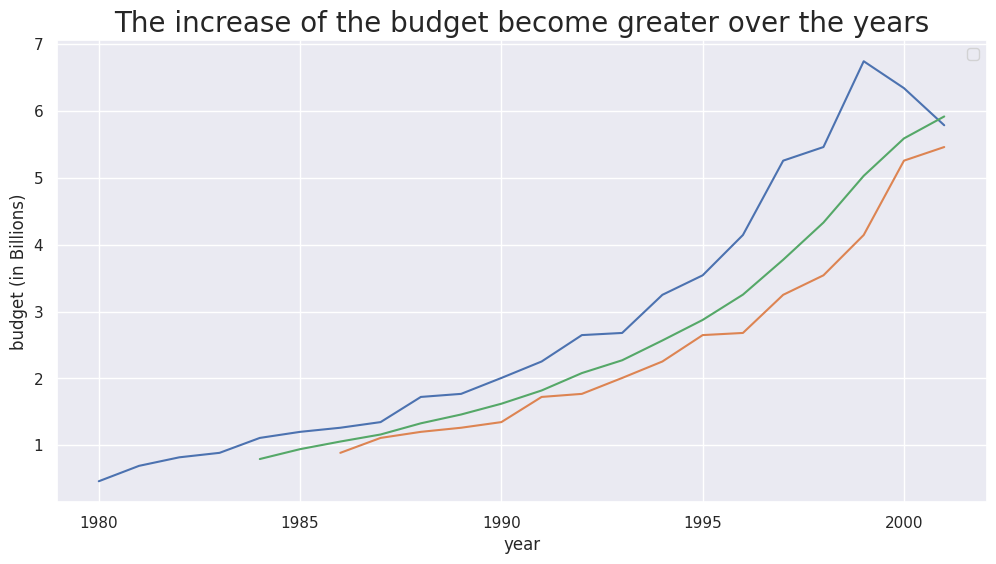

In [37]:
fig = sns.lineplot(data=custo, x='date', y='budget')
yticks = ['{:,.0f}'.format(x) for x in fig.get_yticks() / 1000000000]
fig.set_yticklabels(yticks)
fig.set(xlabel='year', ylabel='budget (in Billions)')
fig.set_title('The increase of the budget become greater over the years', fontdict={'fontsize': 20});
sns.lineplot(data=custo, x='date', y='bud_mean')
sns.lineplot(data=custo, x='date', y='bud_median');

---

## Em qual época houve um pico de lucro provinda de filmes? E em qual houve o menor pico?

In [54]:
lucro = base.groupby(base.date.dt.year)[['liquid']].idxmax()
lucro

,liquid
date,
1980,2
1981,40
1982,107
1983,175
1984,260
1985,345
1986,437
1987,549
1988,642


In [59]:
print(f'No ano {lucro["liquid"].idxmax()} houve o maior pico de vendas dentre todos os anos')

No ano 2001 houve o maior pico de vendas dentre todos os anos


In [60]:
print(f'No ano {lucro["liquid"].idxmin()} houve o menor pico de vendas dentre todos os anos')

No ano 1980 houve o menor pico de vendas dentre todos os anos


---

## Há relação entre os períodos onde houveram grandes picos de vendas com o custo dos filmes?

In [48]:
lucro_custo = base.groupby(base.date.dt.year)[['liquid', 'budget']].sum().reset_index()
lucro_custo

,date,liquid,budget
0,1980,1.309029e+09,4.626500e+08
1,1981,1.145857e+09,6.929000e+08
2,1982,1.880445e+09,8.204750e+08
3,1983,1.433019e+09,8.874290e+08
4,1984,1.887451e+09,1.110605e+09
5,1985,2.032200e+09,1.201260e+09
6,1986,1.672593e+09,1.262687e+09
7,1987,2.009338e+09,1.347068e+09
8,1988,2.626698e+09,1.723330e+09
9,1989,3.804330e+09,1.769188e+09


<Axes: xlabel='date', ylabel='liquid'>

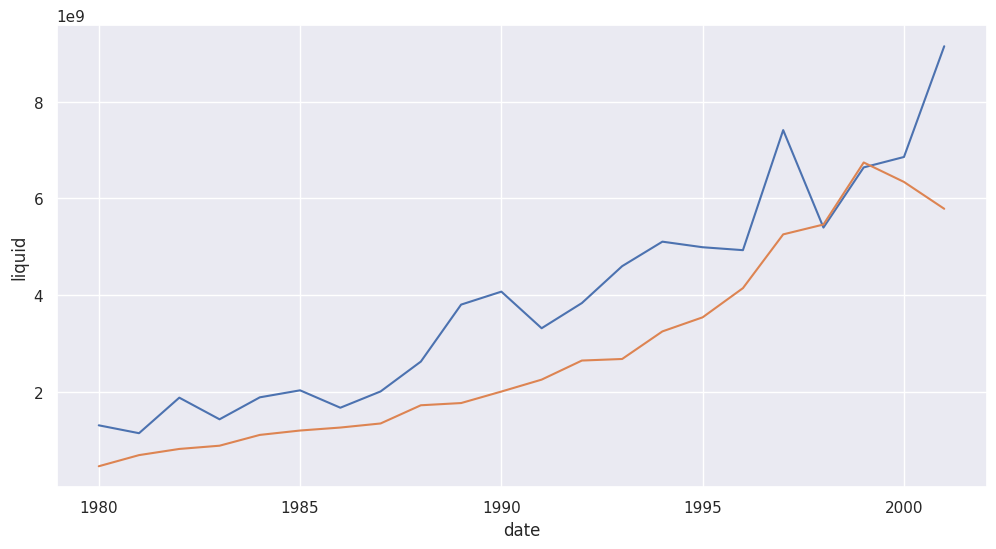

In [50]:
sns.lineplot(data=lucro_custo, x='date', y='liquid')
sns.lineplot(data=lucro_custo, x='date', y='budget')

---